# Step 1 - Importing all libraries used throughout the project

In [1]:
import functions_vanguard as vd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest


# Step 2 - Importing data frames, analyzing and cleaning

## 2.1.1 - Importing Clients Dataframe (df_final_demo)

In [2]:
df_final_demo = vd.import_dataframe()
df_final_demo
   

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


## 2.1.2 Exploring the Dataframe's columns

*Display basic information about the dataset*, 

*Displaying information about **clnt_tenure_yr** (client tenure in years), as well as plotting a histogram to visualize the column's values*

*Displaying information about **clnt_age** (client age), as well as plotting a histogram to visualize the column's values*

*Displaying information about **gendr** (gender), as well as creating a pie chart to visualize the column's values*

*Displaying information about **num_accounts** (number of accounts), as well as creating a pie chart and histogram to visualize the column's values*

*Displaying information about **bal** (balance)*

*Displaying information about **logons_6_mnth** (log on in the past 6 months), as well as creating a histogram to visualize the column's values*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0   

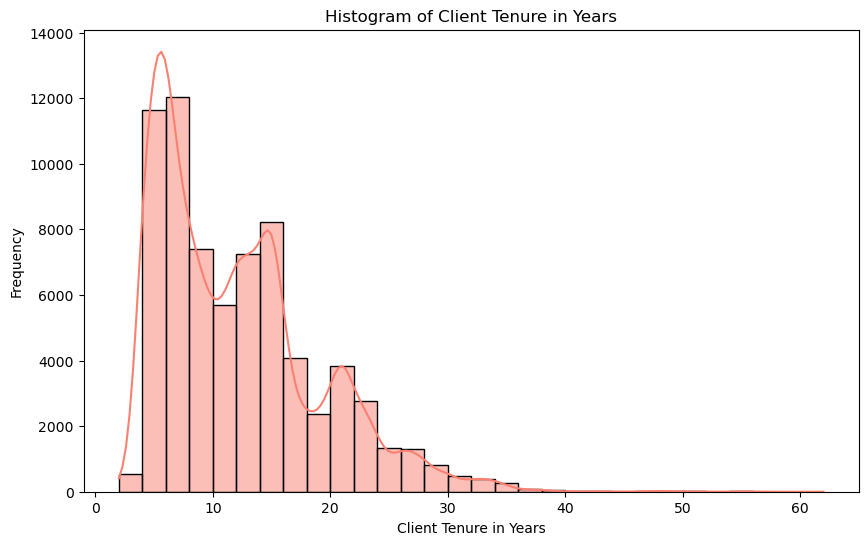

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64


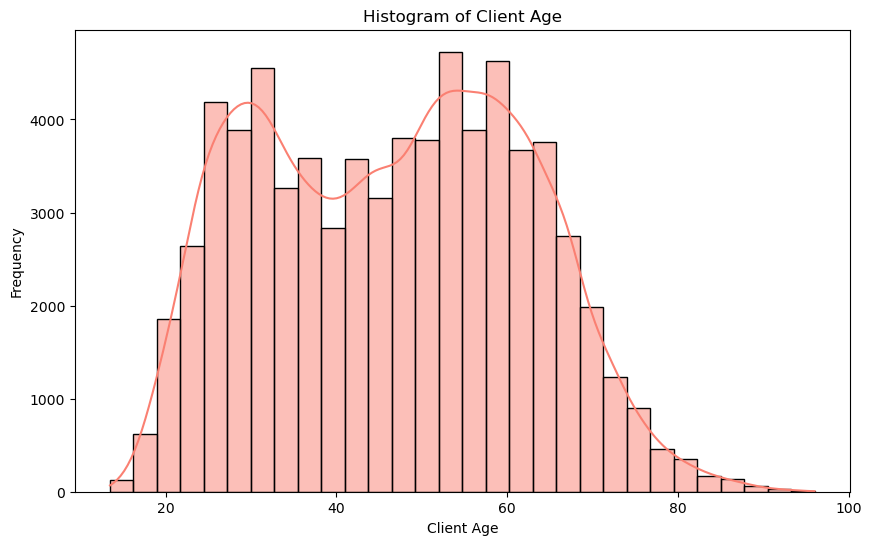

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64


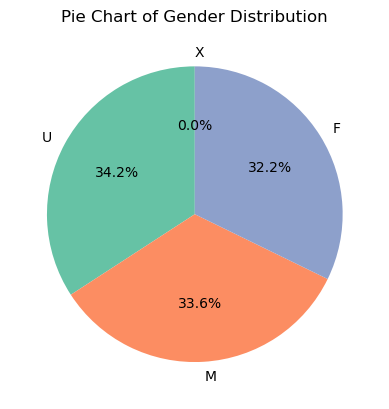

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64


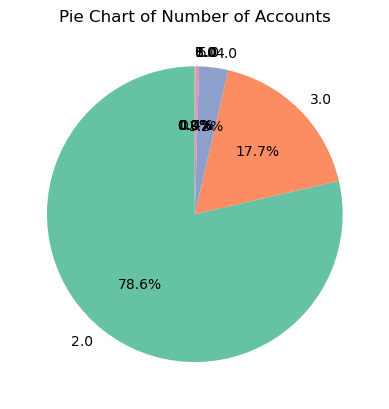

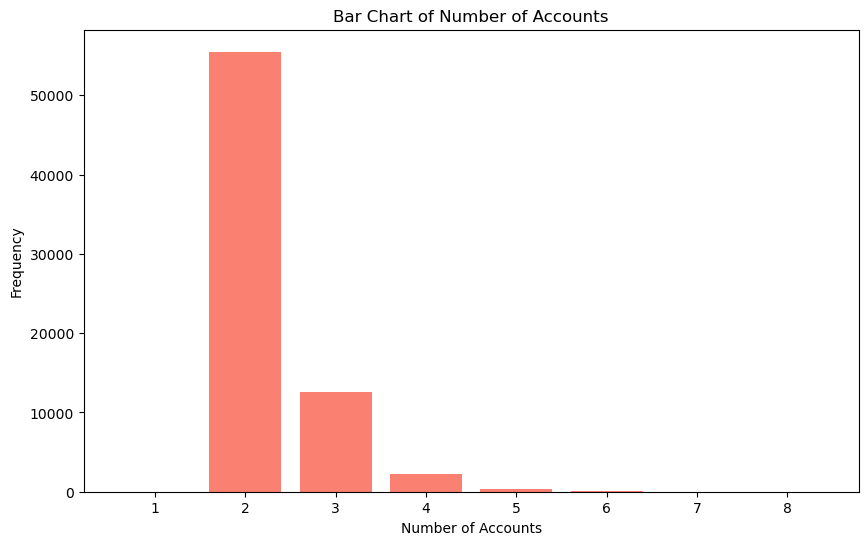

bal
31188.62     5
29388.51     4
31398.74     3
29389.11     3
29388.50     3
            ..
26088.34     1
51203.28     1
94714.11     1
52086.48     1
157498.73    1
Name: count, Length: 70333, dtype: int64
count    7.059500e+04
mean     1.474452e+05
std      3.015087e+05
min      1.378942e+04
25%      3.734683e+04
50%      6.333290e+04
75%      1.375449e+05
max      1.632004e+07
Name: bal, dtype: float64
logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64


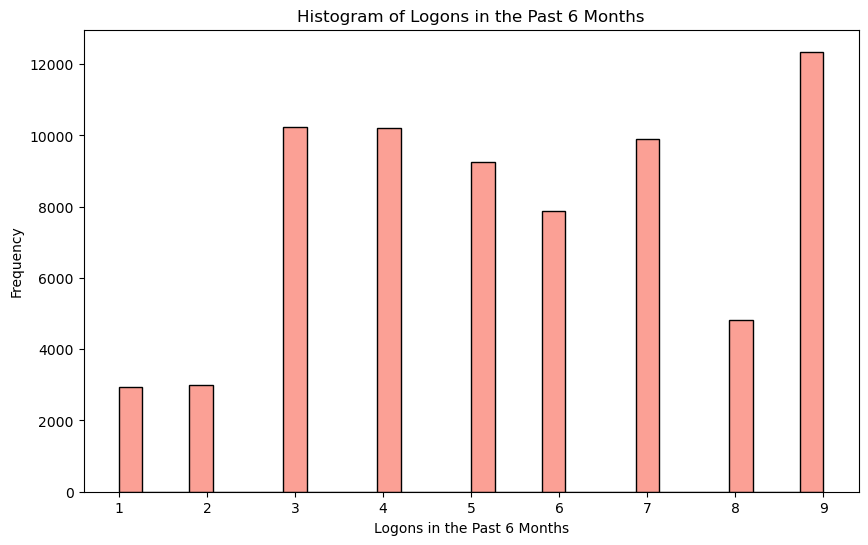

In [3]:
vd.analyze_dataframe(df_final_demo)

## 2.1.3 - Analyzing Client Demographics

In [4]:
#GENDER X REMOVE 

First, we will create a new column to visualize the total tenure in months.

Second, we will categorize the the clients based on their total tenure (in months). They can either be **New** or **Long Standing**

Third, it is important to know whether the clients are **young** or **old**. 

In [5]:
df_final_demo = vd.analyze_client_demographics(df_final_demo)
df_final_demo

   client_id  clnt_tenure_yr  clnt_tenure_mnth  total_tenure_months
0     836976             6.0              73.0                145.0
1    2304905             7.0              94.0                178.0
2    1439522             5.0              64.0                124.0
3    1562045            16.0             198.0                390.0
4    5126305            12.0             145.0                289.0
   client_id  client_status  total_tenure_months
0     836976  Long-standing                145.0
1    2304905  Long-standing                178.0
2    1439522  Long-standing                124.0
3    1562045  Long-standing                390.0
4    5126305  Long-standing                289.0
   client_id  clnt_age age_group
0     836976      60.5     Older
1    2304905      58.0     Older
2    1439522      32.0   Younger
3    1562045      49.0     Older
4    5126305      33.0   Younger
age_group
Younger    35527
Older      35082
Name: count, dtype: int64


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,178.0,Long-standing,Older
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,124.0,Long-standing,Younger
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,390.0,Long-standing,Older
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,289.0,Long-standing,Younger
...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,104.0,Long-standing,Younger
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,292.0,Long-standing,Younger
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,390.0,Long-standing,Older
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,507.0,Long-standing,Older


## 2.1.3 - Identifying Primary Clients

Primary Clients by Tenure and Age Group:
   client_status age_group  count
0  Long-standing     Older  35082
1  Long-standing   Younger  35527


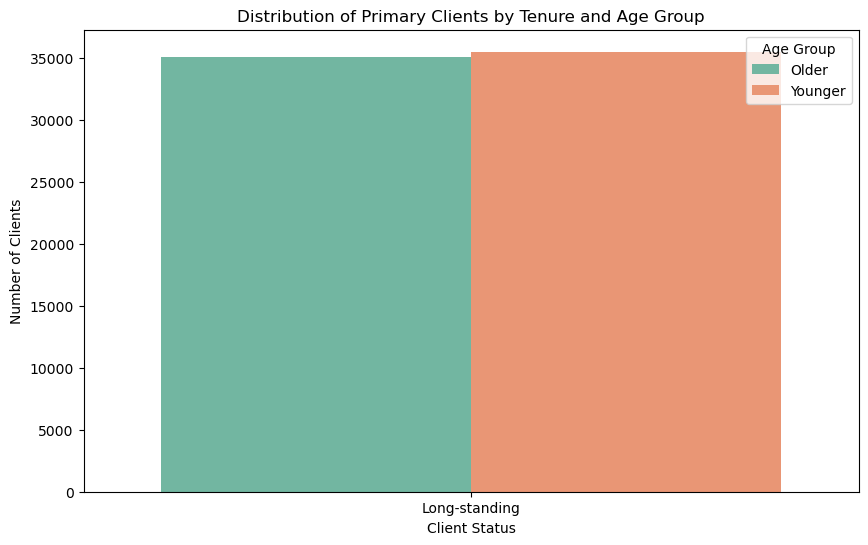

,client_status,age_group,count
0,Long-standing,Older,35082
1,Long-standing,Younger,35527


In [6]:
vd.identify_primary_clients(df_final_demo)

## 2.1.4 Cleaning df_final_demo 

First, we will take a look at which columns are completly empty (except for client_id, whic does not have any null values).

Secondly, we will remove all these rows.

Finally, we will take a look a the types of each column and make adjustments if needed.

In [7]:
df_final_demo=vd.clean_dataframe(df_final_demo)
df_final_demo

Rows with null values in the 'bal' column:
       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
4164     7402828             NaN               NaN       NaN   NaN        NaN   
8316      355337             NaN               NaN       NaN   NaN        NaN   
8677     8412164             NaN               NaN       NaN   NaN        NaN   
13444    2222915             NaN               NaN       NaN   NaN        NaN   
18066    4876926             NaN               NaN       NaN   NaN        NaN   
25961    5277910             NaN               NaN       NaN   NaN        NaN   
28432    7616759             NaN               NaN       NaN   NaN        NaN   
35323    8191345             NaN               NaN       NaN   NaN        NaN   
43518    1227228             NaN               NaN       NaN   NaN        NaN   
46076    8611797             NaN               NaN       NaN   NaN        NaN   
47189    5144725             NaN               NaN       NaN   NaN

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,178.0,Long-standing,Older
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,124.0,Long-standing,Younger
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,390.0,Long-standing,Older
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,289.0,Long-standing,Younger
...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,104.0,Long-standing,Younger
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,292.0,Long-standing,Younger
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,390.0,Long-standing,Older
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,507.0,Long-standing,Older


## 2.2.1 Importing DataFrame Part 1 which provides information about the visits to Vanguard

In [8]:
df_pt1 = vd.import_and_check_dataframe_part1()
df_pt1

Null values in each column:
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


There aren't any null values, so we do not have to clean anything.

## 2.3.1 - Importing DataFrame Part 2 

In [9]:
df_pt2 = vd.import_and_check_dataframe_part2()
display(df_pt2)

Null values in each column:
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## 2.3.2 - Merging the Twin Dataframes

DataFrame Part 2 is an extension to DataFrame Part 1; therefore, they should be merged.

In [10]:
df = vd.merge_dataframes(df_pt1, df_pt2)
df

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
305388,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28


## 2.4.1 - Importing Data Frame about the different groups of clients (Test/Control)

We want to determine the **size** of each of the groups. 

Determining the amount of **null values** in the Dataframe

In [11]:
df_final_experiment = vd.import_and_analyze_experiment_clients()
df_final_experiment

Size of each group:
Variation
Control    23532
Test       26968
dtype: int64
Null values in each column:
client_id        0
Variation    20109
dtype: int64


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [12]:
variation_df = vd.merge_and_clean_dataframes(df_final_demo, df, df_final_experiment)
variation_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group,visitor_id,visit_id,process_step,date_time,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,Test
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,Test
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,Test
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,Test
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,438.0,Long-standing,Older,317123960_46820919455,769876461_30381166055_830233,start,2017-03-31 00:16:12,Test
321191,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,438.0,Long-standing,Older,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11,Test
321192,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,438.0,Long-standing,Older,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40,Test
321193,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,438.0,Long-standing,Older,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51,Test


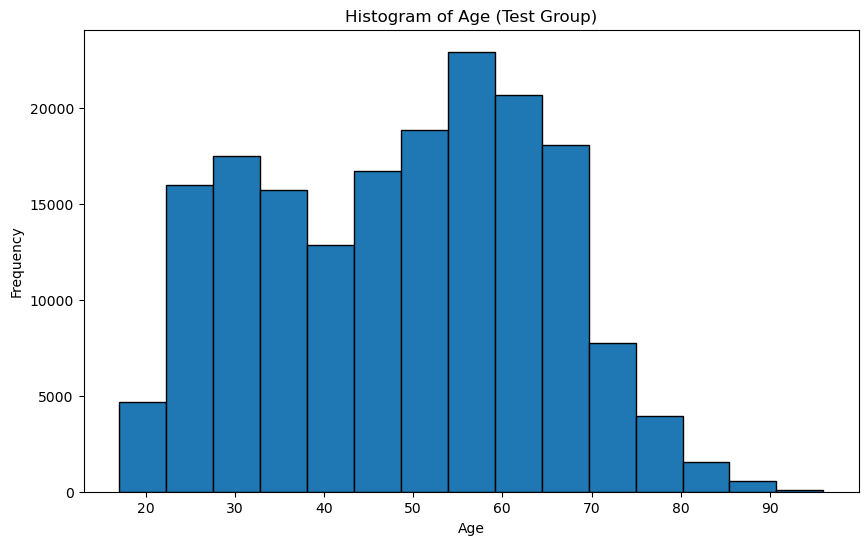

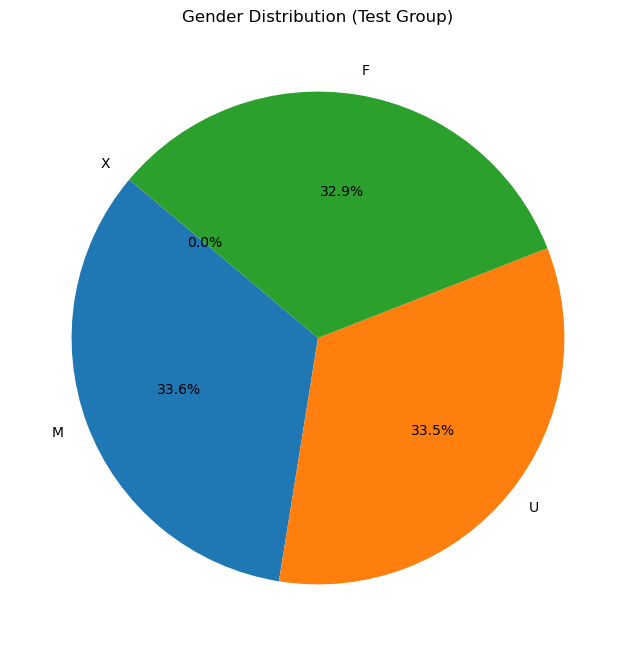

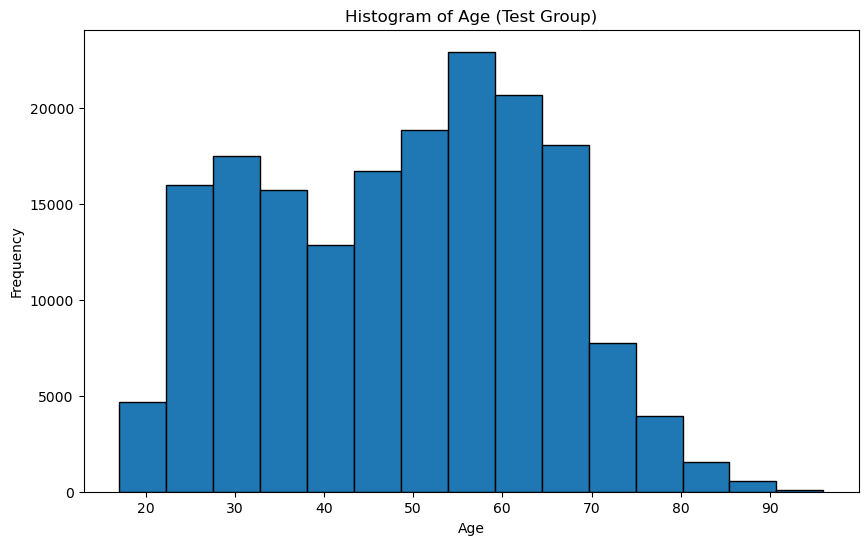

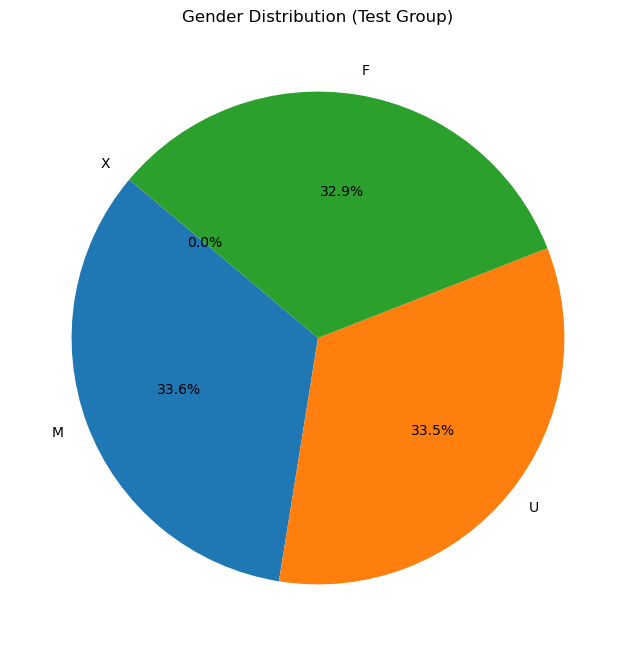

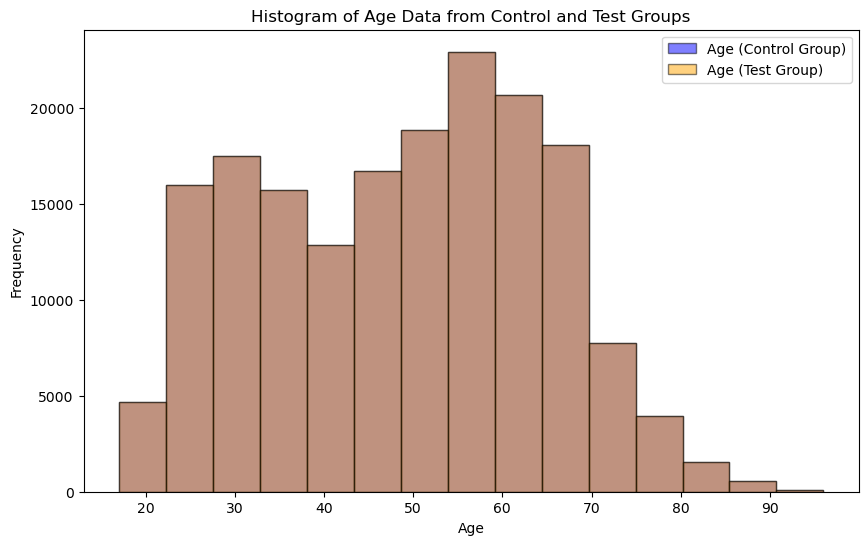

(       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
 0         836976             6.0              73.0      60.5     U        2.0   
 1         836976             6.0              73.0      60.5     U        2.0   
 2         836976             6.0              73.0      60.5     U        2.0   
 3         836976             6.0              73.0      60.5     U        2.0   
 4         836976             6.0              73.0      60.5     U        2.0   
 ...          ...             ...               ...       ...   ...        ...   
 321190   7468138            18.0             222.0      61.0     F        3.0   
 321191   7468138            18.0             222.0      61.0     F        3.0   
 321192   7468138            18.0             222.0      61.0     F        3.0   
 321193   7468138            18.0             222.0      61.0     F        3.0   
 321194   7468138            18.0             222.0      61.0     F        3.0   
 
              

In [13]:
control_df = vd.analyze_test_group(variation_df)
test_df = vd.analyze_test_group(variation_df)
combined_graph = vd.compare_age_distributions(control_df, test_df)
control_df, test_df, combined_graph

# Step 3 - Determining KPI's

## 3.1 - Analyzing the Time Spent on Each Step

Average Time Spent on Each Step:
  process_step  time_spent
0      confirm  116.306452
1        start   58.390644
2       step_1   39.637889
3       step_2   43.589658
4       step_3   94.296477


/Users/pepdemartiolius/Documents/GitHub/PROJECT2/functions_vanguard.py:444: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_spent', data=time_spent_summary, palette='viridis')


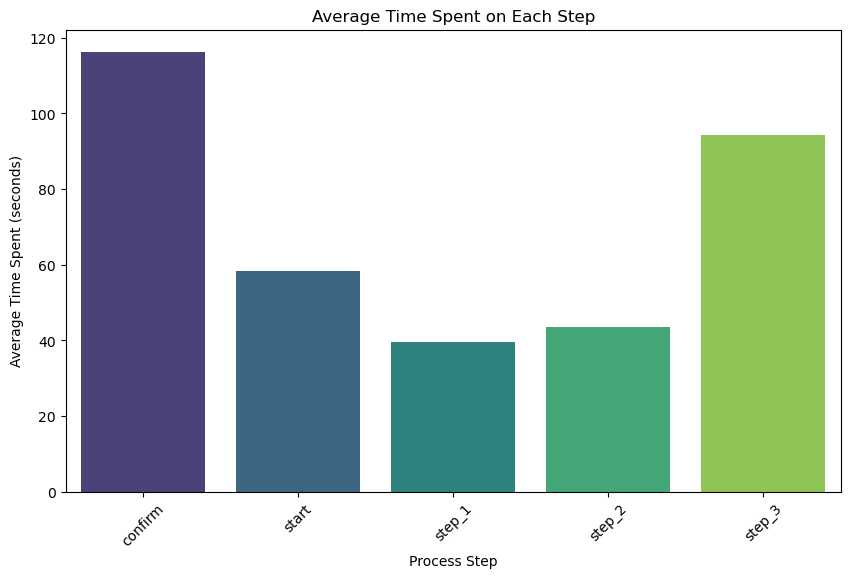

(       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
 304311   3561384             4.0              56.0      59.5     U        2.0   
 304308   3561384             4.0              56.0      59.5     U        2.0   
 78020    7338123             7.0              88.0      23.5     M        2.0   
 78004    7338123             7.0              88.0      23.5     M        2.0   
 78005    7338123             7.0              88.0      23.5     M        2.0   
 ...          ...             ...               ...       ...   ...        ...   
 198745   6627522            18.0             227.0      58.0     F        2.0   
 198744   6627522            18.0             227.0      58.0     F        2.0   
 198748   6627522            18.0             227.0      58.0     F        2.0   
 198749   6627522            18.0             227.0      58.0     F        2.0   
 198750   6627522            18.0             227.0      58.0     F        2.0   
 
              

In [14]:
variation_df, time_spent_summary = vd.analyze_time_spent(variation_df)
variation_df, time_spent_summary

In [15]:
t_stat, p_value = vd.analyze_session_durations(variation_df)
t_stat, p_value

T-statistic: 7.930195431554938
P-value: 1.11021689017394e-15
Reject the null hypothesis. Clients using the new UI have significantly longer session durations.


(7.930195431554938, 1.11021689017394e-15)

## 3.2 - Analyzing Completion Rate

### **Hypothesis 1** - The new design (Test group) has a higher completion rate compared to the old design (Control group).

Z-Statistic: -22.89350661920664
P-Value: 5.392475122751855e-116
Is the difference in completion rates statistically significant at alpha = 0.05? Yes


/Users/pepdemartiolius/Documents/GitHub/PROJECT2/functions_vanguard.py:572: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='completion_rate', data=completion_data, palette='Set1')


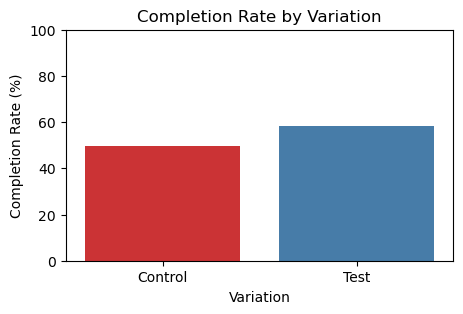

(  Variation  total_sessions  confirm_sessions  completion_rate
 0   Control           32181             16039        49.839968
 1      Test           37122             21725        58.523248,
 -22.89350661920664,
 5.392475122751855e-116)

In [18]:
completion_data, z_stat, p_value = vd.analyze_completion_rates(variation_df)
completion_data, z_stat, p_value

### **Hypothesis 2** - Cost-Effectiveness Hypothesis: The new design leads to a minimum increase of 5% in the completion rate, making it cost-effective.

Completion rate per client (Test group):
client_id
1001101    14.285714
100118      0.000000
1001212    14.285714
1001339    40.000000
1002001     6.250000
             ...    
9999150     0.000000
9999400    20.000000
9999626     0.000000
9999729     9.090909
9999832     0.000000
Name: completion, Length: 26961, dtype: float64
The observed increase in completion rate meets or exceeds the 5% threshold and is statistically significant.
Mean completion rate: 14.28%
t-statistic: 109.53, p-value: 0.0000


/Users/pepdemartiolius/Documents/GitHub/PROJECT2/functions_vanguard.py:598: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clients['completion'] = test_clients['process_step'] == 'confirm'


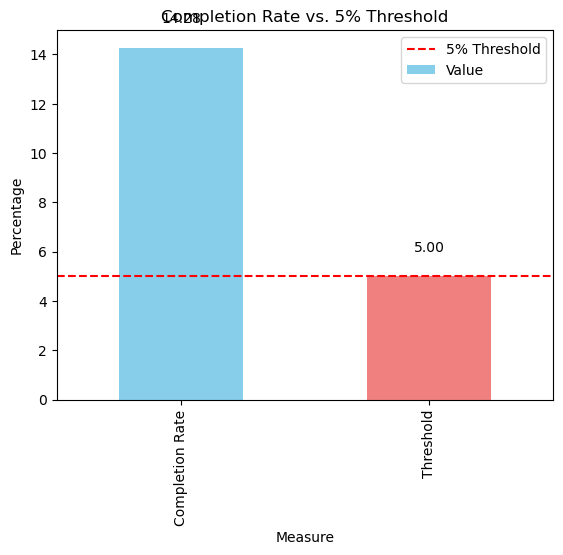

Observed Increase in Completion Rate: 8.68%


In [19]:
vd.analyze_cost_effectiveness(variation_df, completion_data, threshold=5.0)

## 3.3 - Analyzing Engagement

### **Hypothesis 3** -  (H0) The session durations of clients using the new UI are equal to or shorter than those using the old UI and (H1) The session durations of clients using the new UI are longer than those using the old UI.

Average Time Spent on Each Step (Control Group):
  process_step  time_spent Variation
0      confirm  122.694765   Control
1        start   54.335477   Control
2       step_1   42.568871   Control
3       step_2   38.524249   Control
4       step_3   92.515996   Control
Average Time Spent on Each Step (Test Group):
  process_step  time_spent Variation
0      confirm  111.959636      Test
1        start   61.809148      Test
2       step_1   37.394860      Test
3       step_2   47.820970      Test
4       step_3   95.863682      Test
Combined DataFrame:


,process_step,time_spent,Variation
0,start,54.335477,Control
1,start,61.809148,Test
2,step_1,42.568871,Control
3,step_1,37.394860,Test
4,step_2,38.524249,Control
5,step_2,47.820970,Test
6,step_3,92.515996,Control
7,step_3,95.863682,Test
8,confirm,122.694765,Control
9,confirm,111.959636,Test


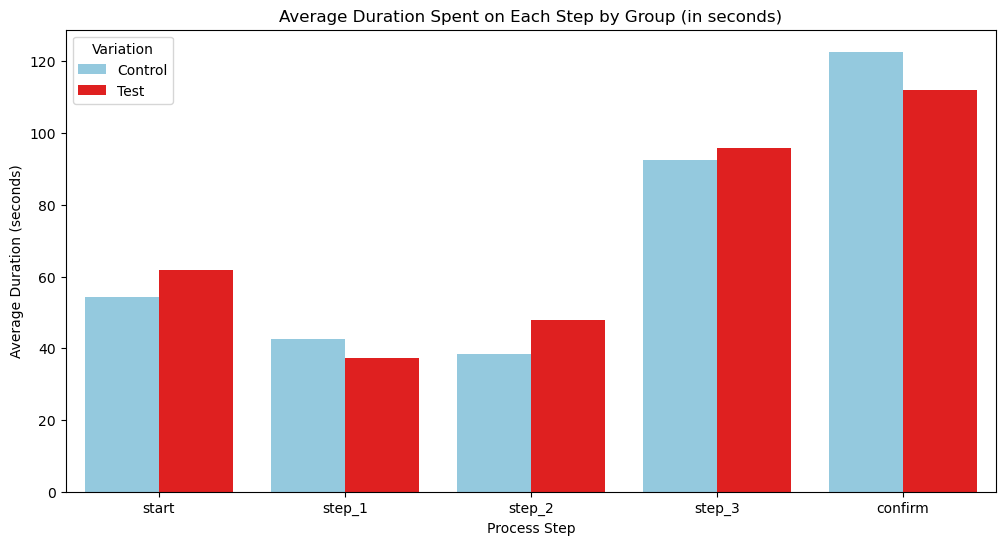

T-test Results for Each Process Step:
  process_step  control_mean   test_mean     t_stat       p_value
0        start     54.335477   61.809148  -4.258419  2.060898e-05
1       step_1     42.568871   37.394860   6.749410  1.496968e-11
2       step_2     38.524249   47.820970 -13.243795  5.650431e-40
3       step_3     92.515996   95.863682  -3.073406  2.117474e-03
4      confirm    122.694765  111.959636   5.290626  1.225098e-07


,process_step,control_mean,test_mean,t_stat,p_value
0,start,54.335477,61.809148,-4.258419,2.060898e-05
1,step_1,42.568871,37.394860,6.749410,1.496968e-11
2,step_2,38.524249,47.820970,-13.243795,5.650431e-40
3,step_3,92.515996,95.863682,-3.073406,2.117474e-03
4,confirm,122.694765,111.959636,5.290626,1.225098e-07


In [20]:
vd.analyze_session_durations_by_step(variation_df)

## 3.4 - Analyzing Error Rates

### **Hypothesis 4** - (H0) Clients in the test group complete the process with the same or higher error rates and retries compared to the control group and (H1) clients in the test group complete the process with fewer errors and retries compared to the control group.

Error Rates:
  Variation  Error Rate
0   Control    0.067716
1      Test    0.091936


/Users/pepdemartiolius/Documents/GitHub/PROJECT2/functions_vanguard.py:766: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='Error Rate', data=error_rates, palette=['skyblue', 'red'])


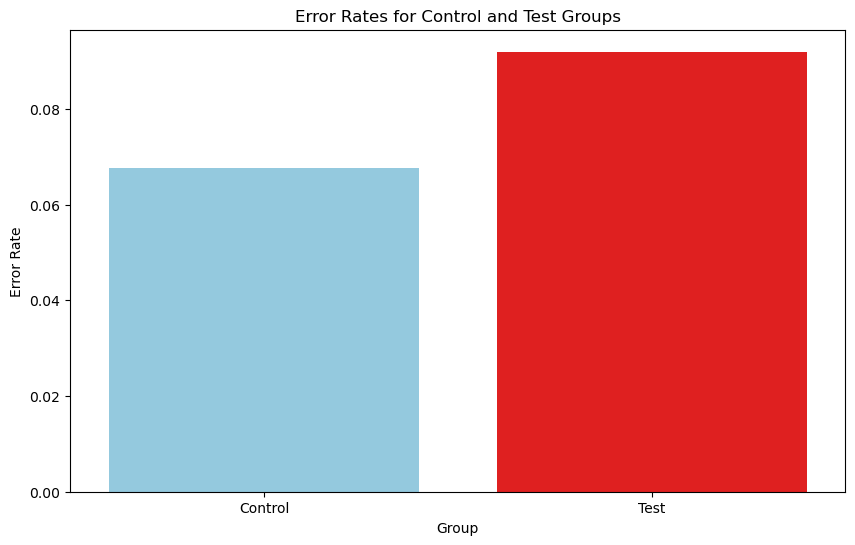

Chi-Square Test:
Chi2: 624.3513082448144
p-value: 8.459968557371252e-138


(  Variation  Error Rate
 0   Control    0.067716
 1      Test    0.091936,
 624.3513082448144,
 8.459968557371252e-138)

In [21]:
vd.analyze_error_rates(variation_df)